# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils
from keras.optimizers import Adam

# Loading And Preprocessing

In [4]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
X = diabetes.data
y = diabetes.target

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


#### checking null values

In [6]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

# EDA

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [9]:
df.duplicated().sum()

0

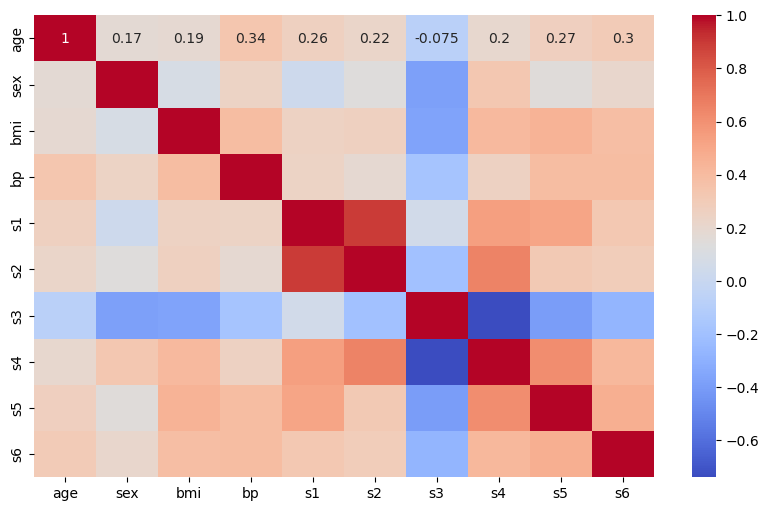

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building the ANN model

In [82]:
# Create a Deep Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [83]:
# Compile the model
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

In [84]:
X_train.shape

(353, 10)

In [86]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

# Training the ANN model

Epoch 1/64


C:\Users\joncy\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 29986.8789
Epoch 2/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 30624.0371
Epoch 3/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 29630.1855
Epoch 4/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 28692.8223
Epoch 5/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 31277.4863
Epoch 6/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 30301.0469
Epoch 7/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 29187.2422
Epoch 8/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 28668.4883
Epoch 9/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 29227.8887
Epoch 10/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 28788.2188
Epoch 11/64
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 29184.67

KeyError: 'val_loss'

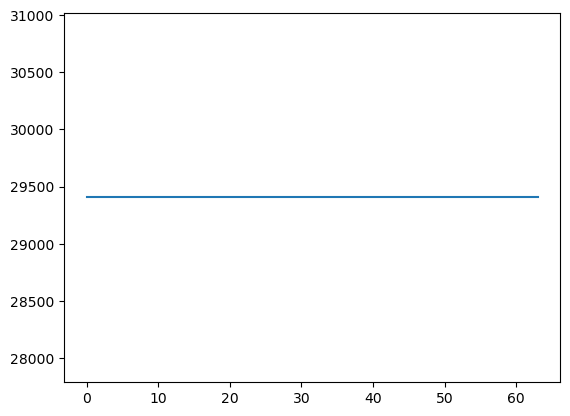

In [87]:
# Train the model
history = model.fit(X_train, y_train, epochs=64, verbose=1)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
X_train.shape

(353, 10)

# Evaluating the model

In [88]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

In [92]:
# Import the necessary metrics
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 26258.03370786517
R² Score: -3.9560742980261


C:\Users\joncy\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


# Improving the model

In [93]:
# Modify the model with more layers or different activation functions
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='tanh'))  # changed activation function
model.add(Dense(64, activation='tanh'))  # added another layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile with a different optimizer (e.g., RMSprop)
model.compile(loss='mean_squared_error', optimizer='RMSprop')

# Retrain the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32)

# Re-evaluate the performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved Mean Squared Error: {mse}")
print(f"Improved R² Score: {r2}")

Epoch 1/150


C:\Users\joncy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 29532.0020 - val_loss: 25388.3594
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29977.1816 - val_loss: 24306.9629
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29763.8164 - val_loss: 23289.7969
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24703.7559 - val_loss: 22255.8594
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24691.9434 - val_loss: 21394.7852
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23501.4043 - val_loss: 20477.9570
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22194.8555 - val_loss: 19496.8086
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20763.5566 - val_loss: 18562.3535
Epoch 9/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20773.3398 - val_loss: 17585.3438
Epoch 10/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20507.3984 - val_loss: 16669.0020
Epoch 11/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17379.4961 - val_los

<b> Model Comparison
Mean Squared Error: 26258.03370786517, 
R² Score: -3.9560742980261, 
Improved Mean Squared Error: 3654.8040811660403, 
Improved R² Score: 0.31017376348472325 </b>
<p>Thus we could minimise Mean Squared Error as the improved value is less and Increase R² score as the improved value is more close to 1</p>